In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

%matplotlib inline
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200
plt.rcParams["figure.figsize"] = (6,4)

from labellines import labelLines

In [39]:
file = 'lower_wall.csv'
path_file = os.path.join('postProcessing', file)
data = pd.read_csv(path_file)
data

,U:0,U:1,U:2,k,nut,omega,p,vorticity:0,vorticity:1,vorticity:2,...,yPlus,cellID,vtkValidPointMask,arc_length,cf,cp,Points:0,Points:1,Points:2,Point ID
0,0.000000,0.000000,0,9.240640e-12,0.000000e+00,12.8,-3.366440e-04,0,0,-0.020397,...,0.004162,5524,1,0.000,-0.000025,-0.420805,1.000,0,0,0
1,0.000000,0.000000,0,1.388280e-11,0.000000e+00,12.8,-3.366460e-04,0,0,-0.025371,...,0.004646,5524,1,0.001,-0.000031,-0.420807,1.001,0,0,1
2,0.000000,0.000000,0,1.852440e-11,0.000000e+00,12.8,-3.366480e-04,0,0,-0.030343,...,0.005130,5524,1,0.002,-0.000037,-0.420810,1.002,0,0,2
3,0.000000,0.000000,0,2.316650e-11,0.000000e+00,12.8,-3.366490e-04,0,0,-0.035316,...,0.005613,5524,1,0.003,-0.000043,-0.420812,1.003,0,0,3
4,0.000000,0.000000,0,2.780810e-11,0.000000e+00,12.8,-3.366510e-04,0,0,-0.040289,...,0.006097,5524,1,0.004,-0.000049,-0.420814,1.004,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,0.001110,-0.000039,0,1.199730e-06,3.189590e-08,12.8,-3.486590e-07,0,0,-1.167510,...,0.993177,5623,1,0.996,-0.001052,-0.000436,1.996,0,0,996
997,0.001295,-0.000045,0,1.204390e-06,3.721140e-08,12.8,-2.720570e-07,0,0,-1.156160,...,0.911720,5623,1,0.997,-0.000971,-0.000340,1.997,0,0,997
998,0.001480,-0.000051,0,1.209050e-06,4.252760e-08,12.8,-1.954470e-07,0,0,-1.144810,...,0.830253,5623,1,0.998,-0.000891,-0.000244,1.998,0,0,998
999,0.001665,-0.000058,0,1.213710e-06,4.784320e-08,12.8,-1.188450e-07,0,0,-1.133460,...,0.748796,5623,1,0.999,-0.000810,-0.000149,1.999,0,0,999


In [40]:
x = data['Points:0']
cf = data['cf']
cp = data['cp']

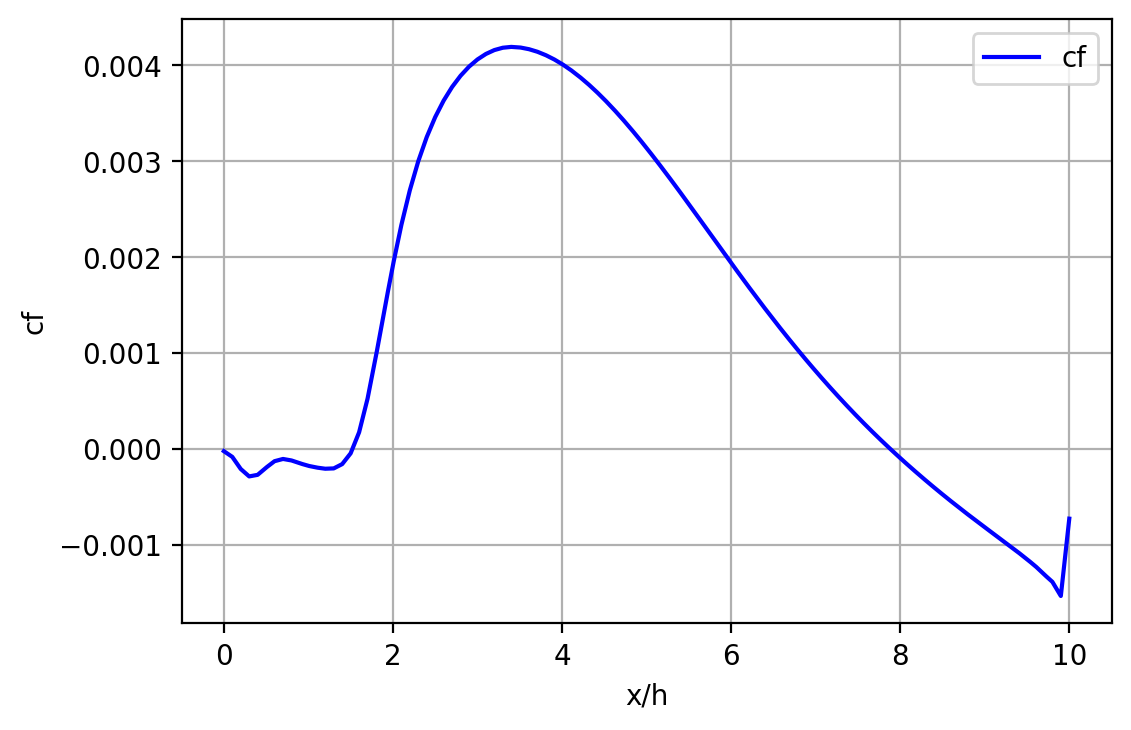

In [41]:
plt.plot((x-1)/0.1,cf, c='b', label='cf')
plt.xlabel('x/h')
plt.ylabel('cf')
plt.legend()
plt.grid()

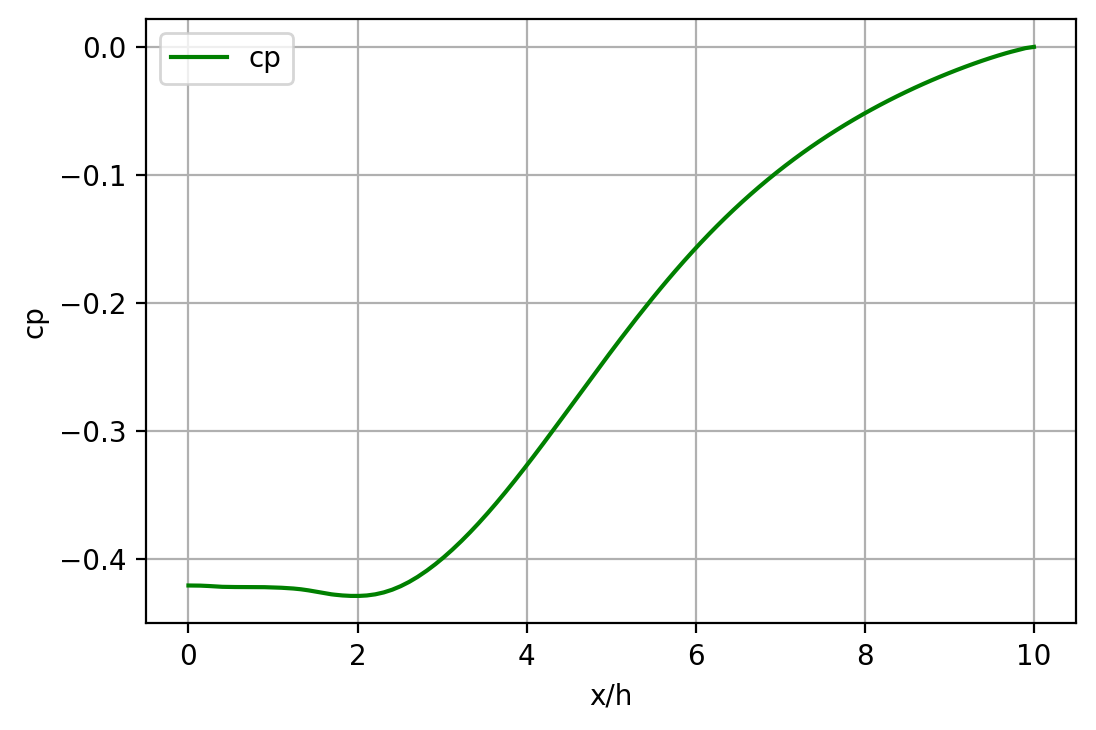

In [42]:
plt.plot((x-1)/0.1,cp, c='g', label='cp')
plt.xlabel('x/h')
plt.ylabel('cp')
plt.legend()
plt.grid()

In [43]:
file = 'residuals.dat'
path_file = os.path.join('postProcessing','residuals','0', file)
data = pd.read_csv(path_file, delim_whitespace=True)
print(data.columns)
#data.columns = ['Time','p','Ux','Uy','k','omega','NA']
data

Index(['#Time', 'p', 'Ux', 'Uy', 'k', 'omega'], dtype='object')


,#Time,p,Ux,Uy,k,omega
0,0,NaN,NaN,NaN,NaN,NaN
1,1,1.000000,1.000000,1.000000,1.000000,0.101141
2,2,0.005352,0.765872,0.407388,0.176353,0.024334
3,3,0.023517,0.307553,0.384688,0.144030,0.016107
4,4,0.100008,0.163836,0.281803,0.126760,0.013601
...,...,...,...,...,...,...
1996,1996,0.008947,0.000999,0.018505,0.023021,0.005076
1997,1997,0.008318,0.000978,0.018567,0.021274,0.004520
1998,1998,0.008035,0.000983,0.017138,0.020623,0.004373
1999,1999,0.008462,0.000998,0.017919,0.024164,0.005035


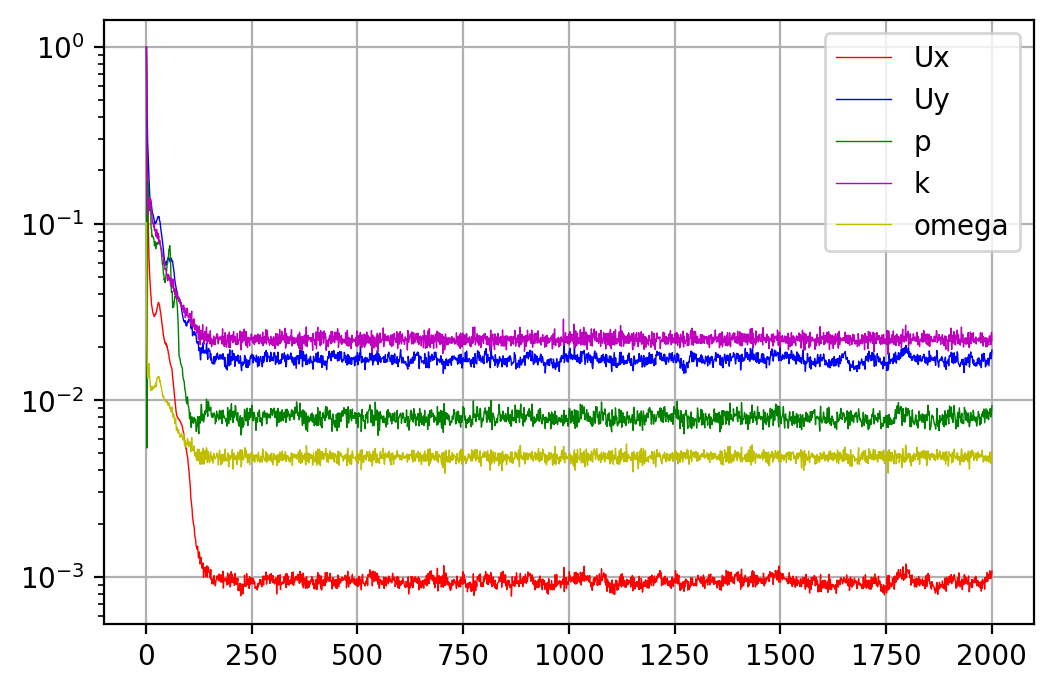

In [44]:
plt.plot(data['Ux'], linewidth=0.5, label='Ux', c='r')
plt.plot(data['Uy'], linewidth=0.5, label='Uy', c='b')
plt.plot(data['p'], linewidth=0.5, label='p', c='g')
plt.plot(data['k'], linewidth=0.5, label='k', c='m')
plt.plot(data['omega'], linewidth=0.5, label='omega', c='y')


plt.legend()
plt.grid()
plt.yscale('log')